In [1]:
import numpy as np
import pandas as pd

from Environment import *
from Agents import Agent
from Simulate import *
import utils

In [2]:
cg = np.array([1.0])# , 0.5, 0.25])
n_actions = 3
dt = 1.0
productivity= 5.0

n_products = cg.shape[0]
state_dims = 2*n_products

Ntimes = 2000

Using Consumption Error Linear Reward

In [3]:
agent = Agent(gamma=0.9, 
                  epsilon=1.0, 
                  eps_end = 0.001,
                  eps_dec = 0.01,
                  batch_size=64,  
                  input_dims=[state_dims], 
                  lr=0.001, 
                  n_actions=n_actions, 
                  )

env = Environment(cg=cg, 
                productivity=productivity, 
                dt=dt, 
                n_actions=n_actions,
                agent=agent)

env.set_reward_function('error')

sim = Simulate(agent, env)

omega = env.omega1

In [4]:
env.reward_func

'error'

In [5]:
trange, Aarray, qarray, Carray, Qarray, Darray, Rarray, epsilon_list, Parray =sim.run_simulation(Ntimes)

In [6]:
env.n_products

1

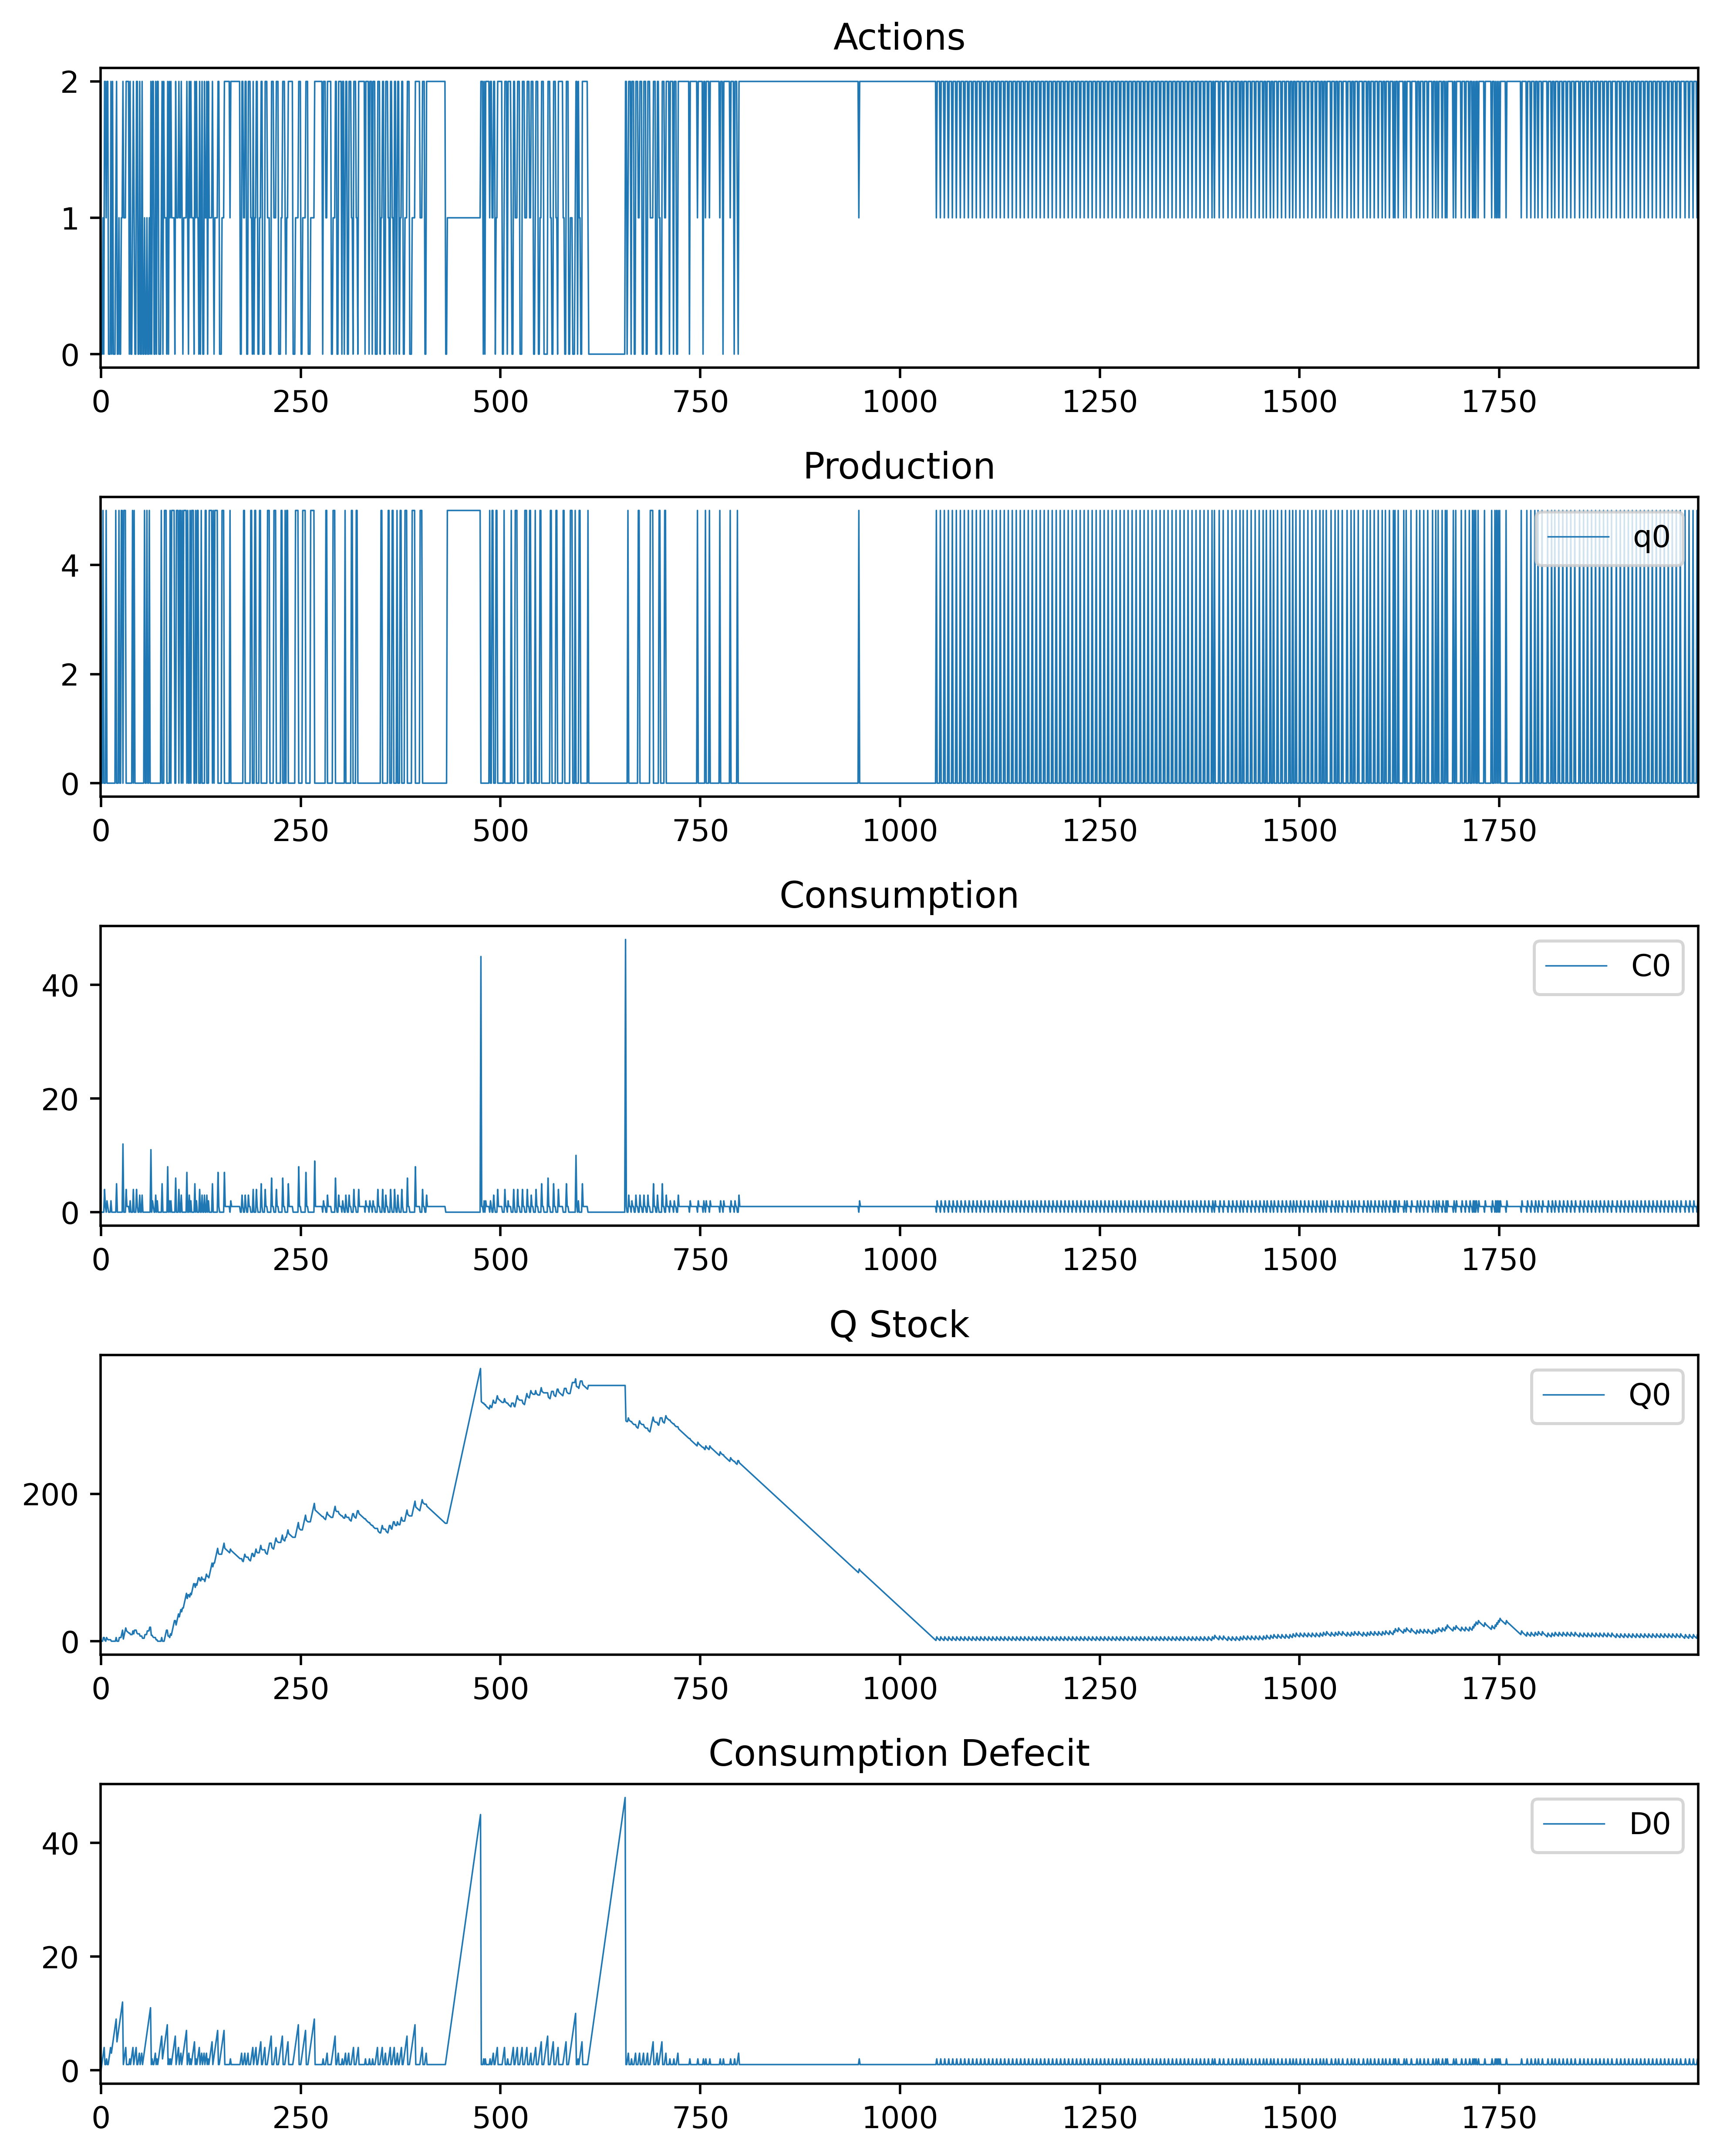

In [7]:
utils.plot_states(trange, Aarray, qarray, Carray, Qarray, Darray)

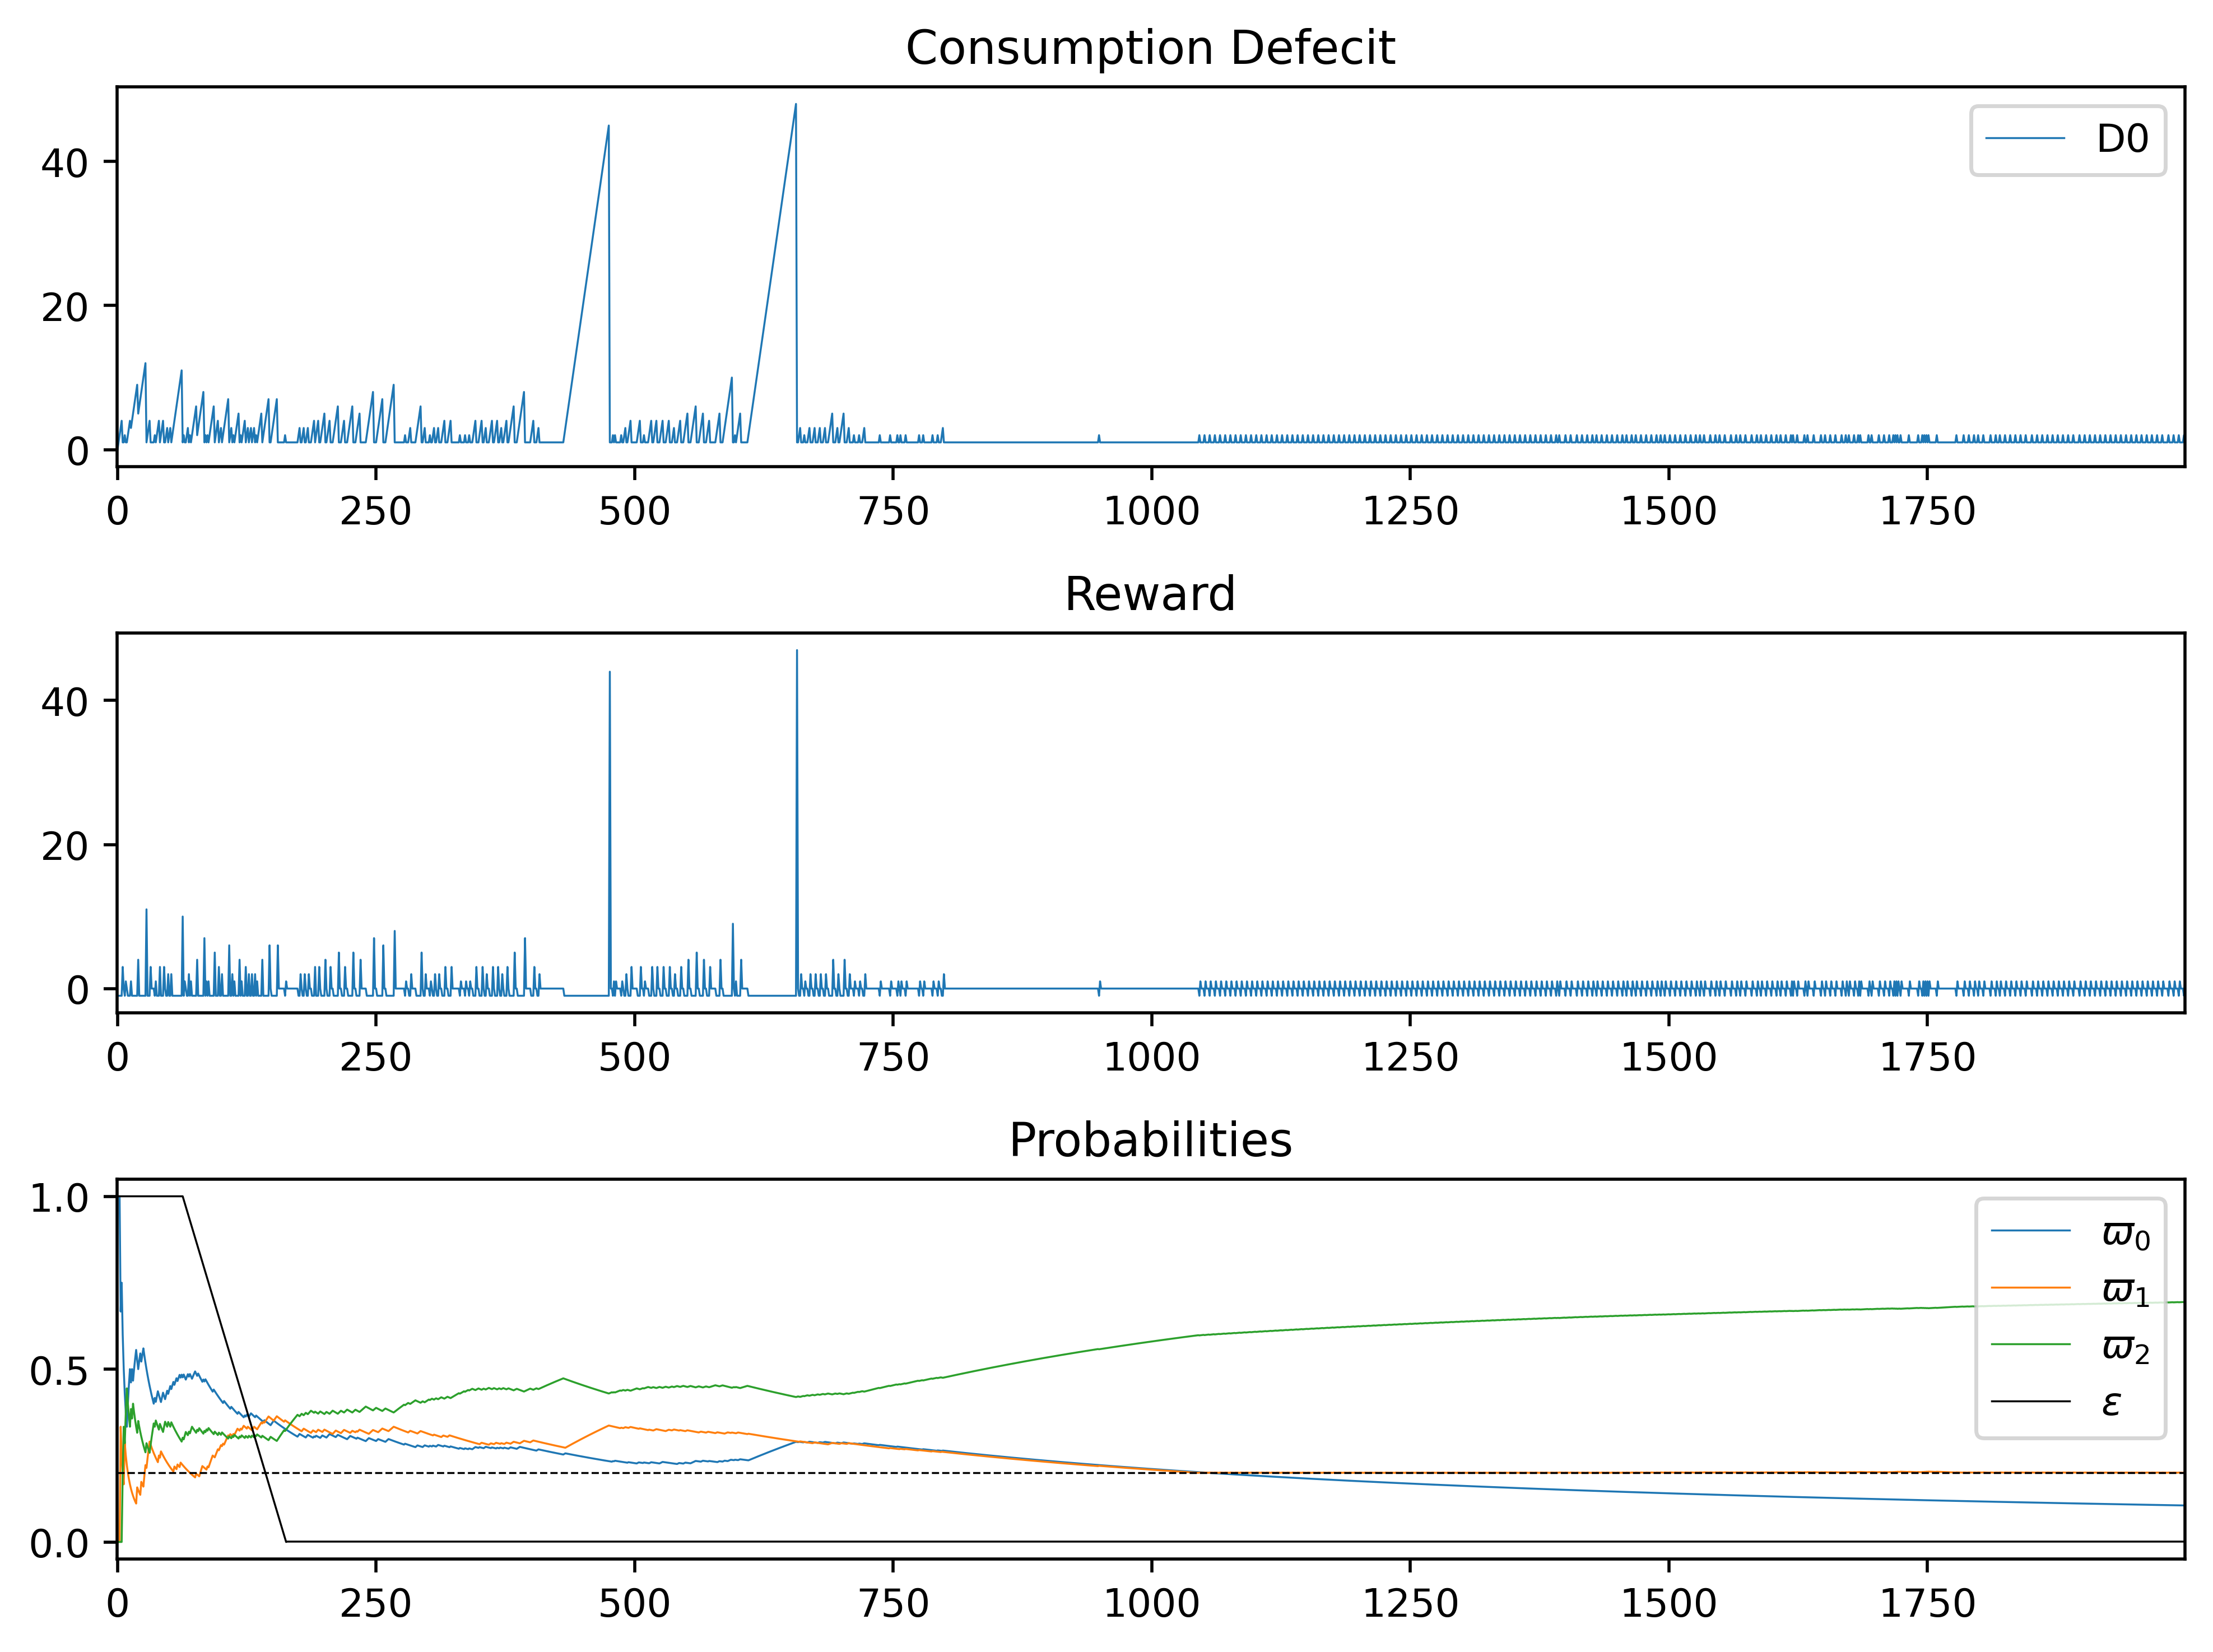

In [8]:
utils.plot_decisions(trange, Darray, Rarray, epsilon_list, Parray, omega)

Using Deficit Linear Rewards

In [9]:
agent = Agent(gamma=0.9,#25, 
                  epsilon=1.0, 
                  eps_end = 0.001,
                  eps_dec = 0.01,
                  batch_size=64,  
                  input_dims=[state_dims], 
                  lr=0.001, 
                  n_actions=n_actions, 
                  )

env = Environment(cg=cg, 
                productivity=productivity, 
                dt=dt, 
                n_actions=n_actions,
                agent=agent)

env.set_reward_function('deficit')

sim = Simulate(agent, env)

omega = env.omega1

In [10]:
env.reward_func

'deficit'

In [11]:
trange, Aarray, qarray, Carray, Qarray, Darray, Rarray, epsilon_list, Parray =sim.run_simulation(Ntimes)

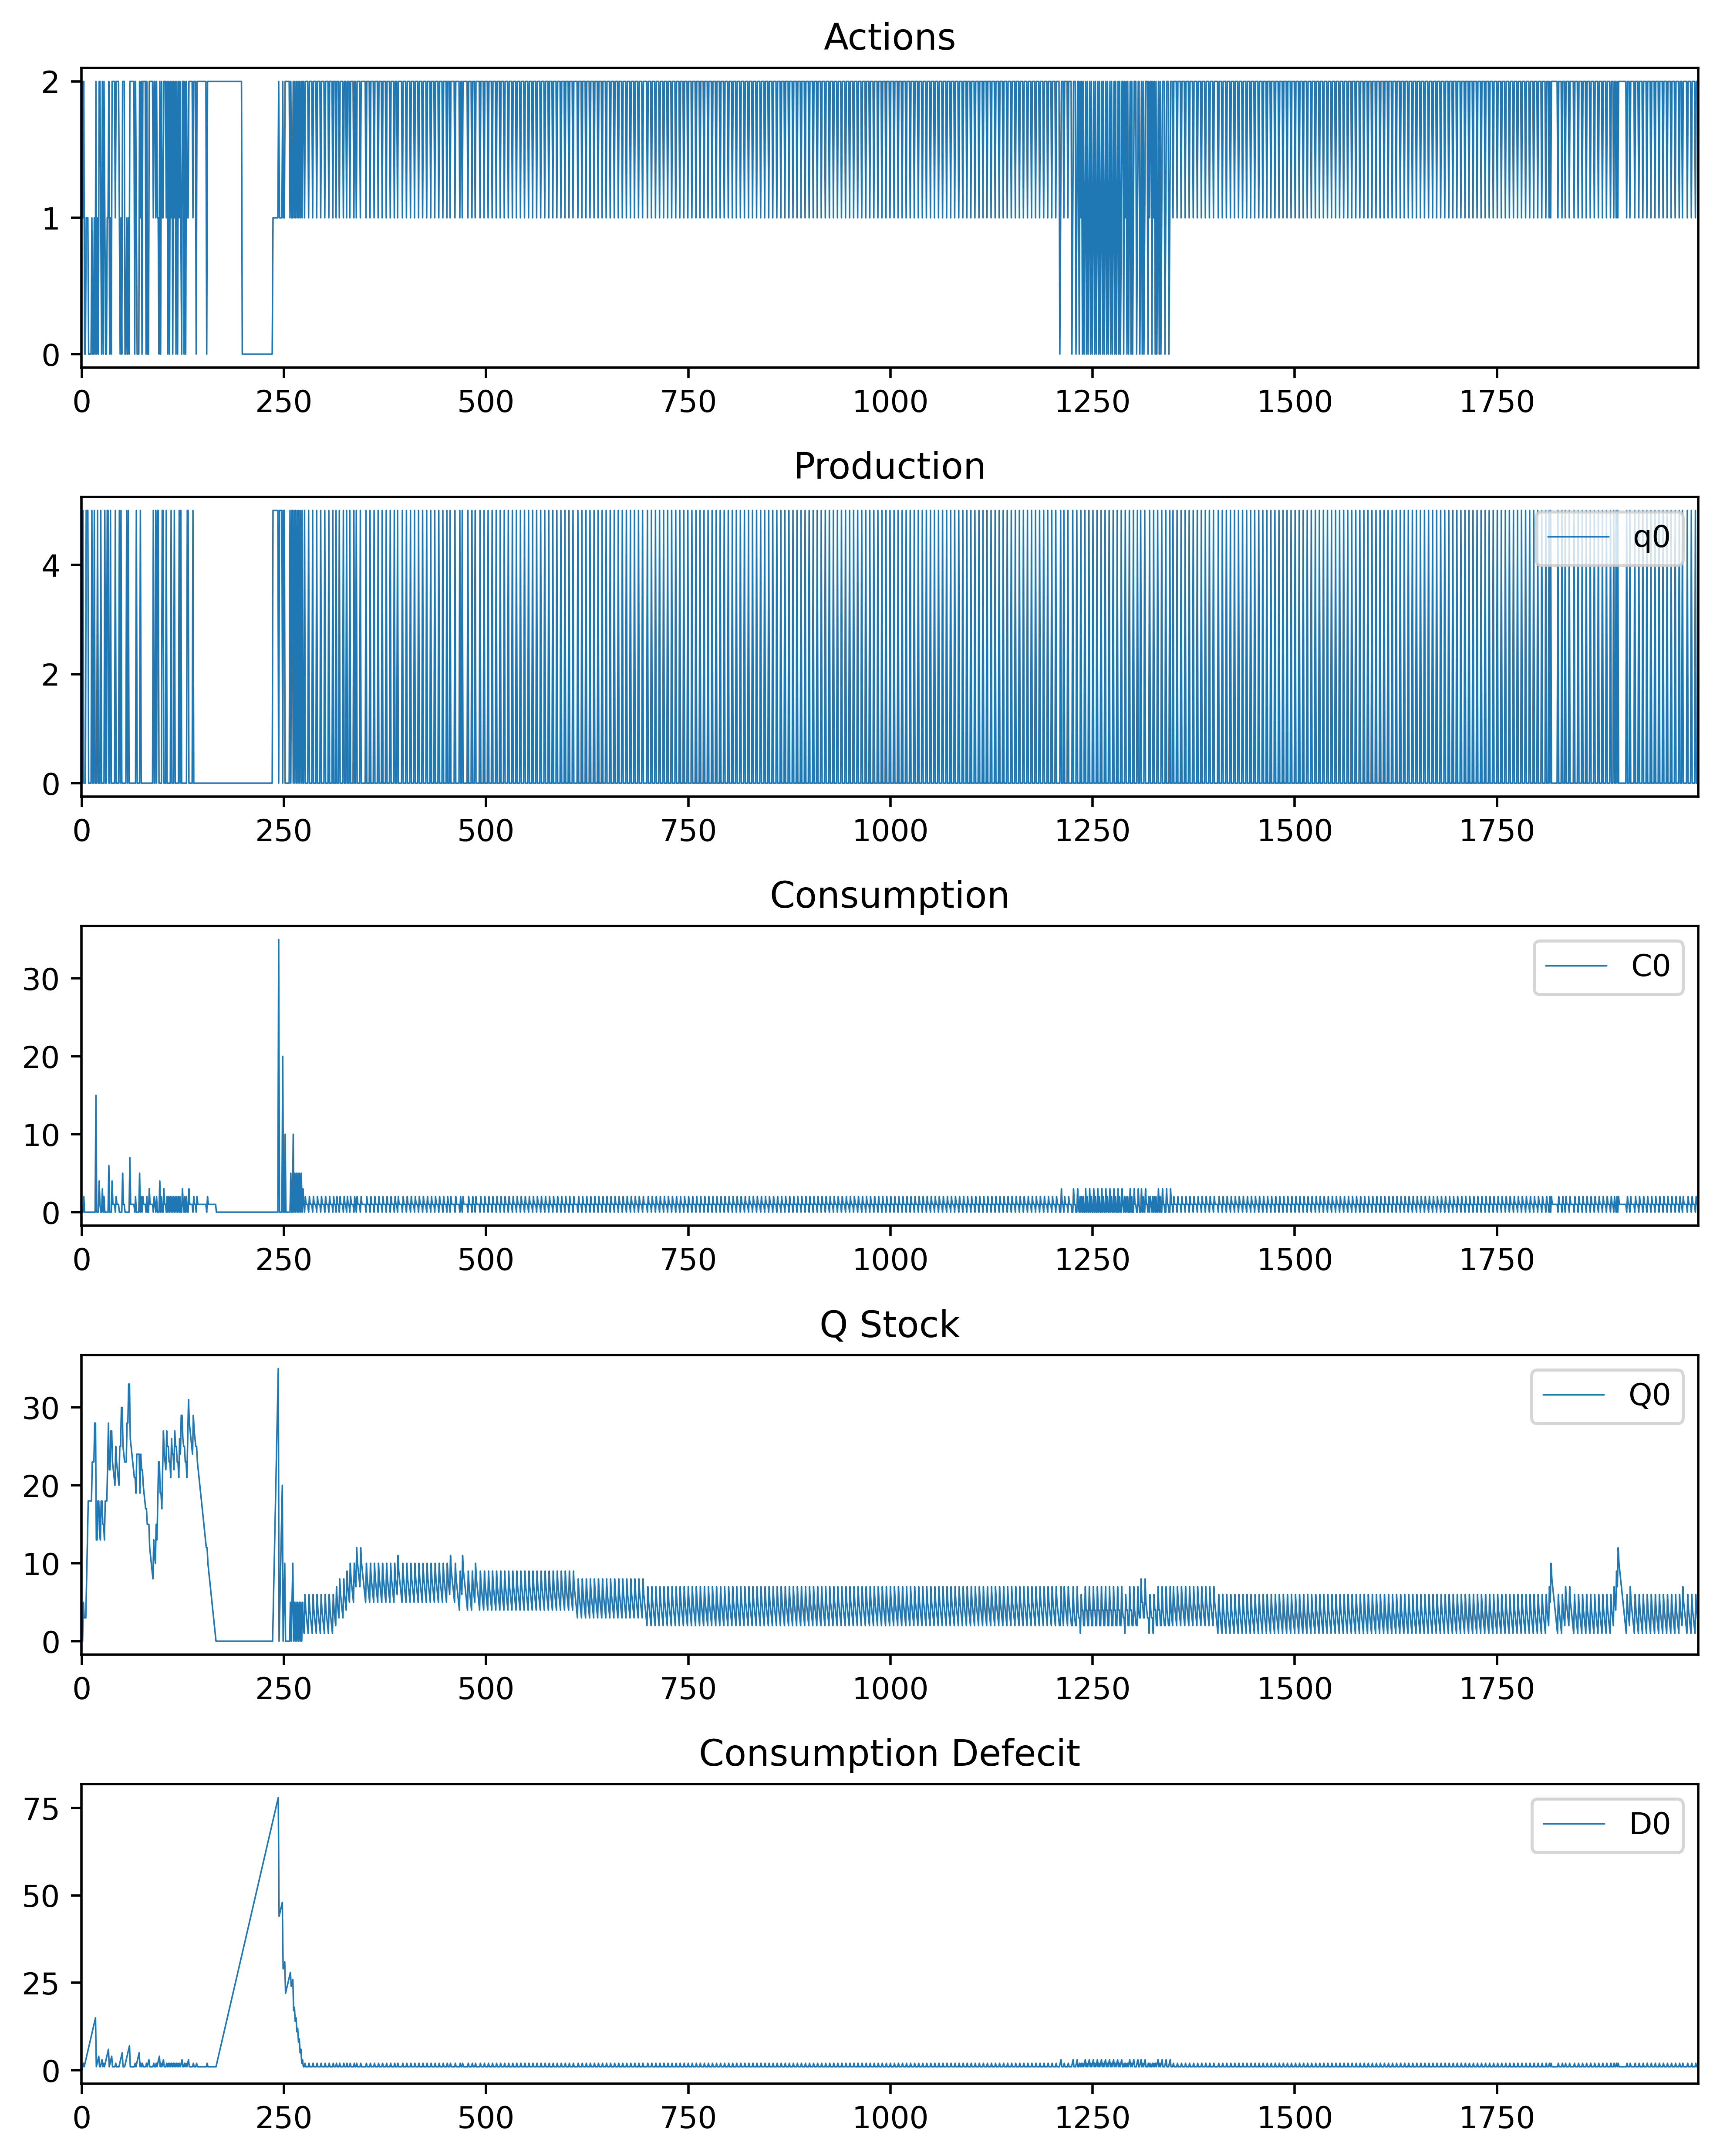

In [12]:
utils.plot_states(trange, Aarray, qarray, Carray, Qarray, Darray)

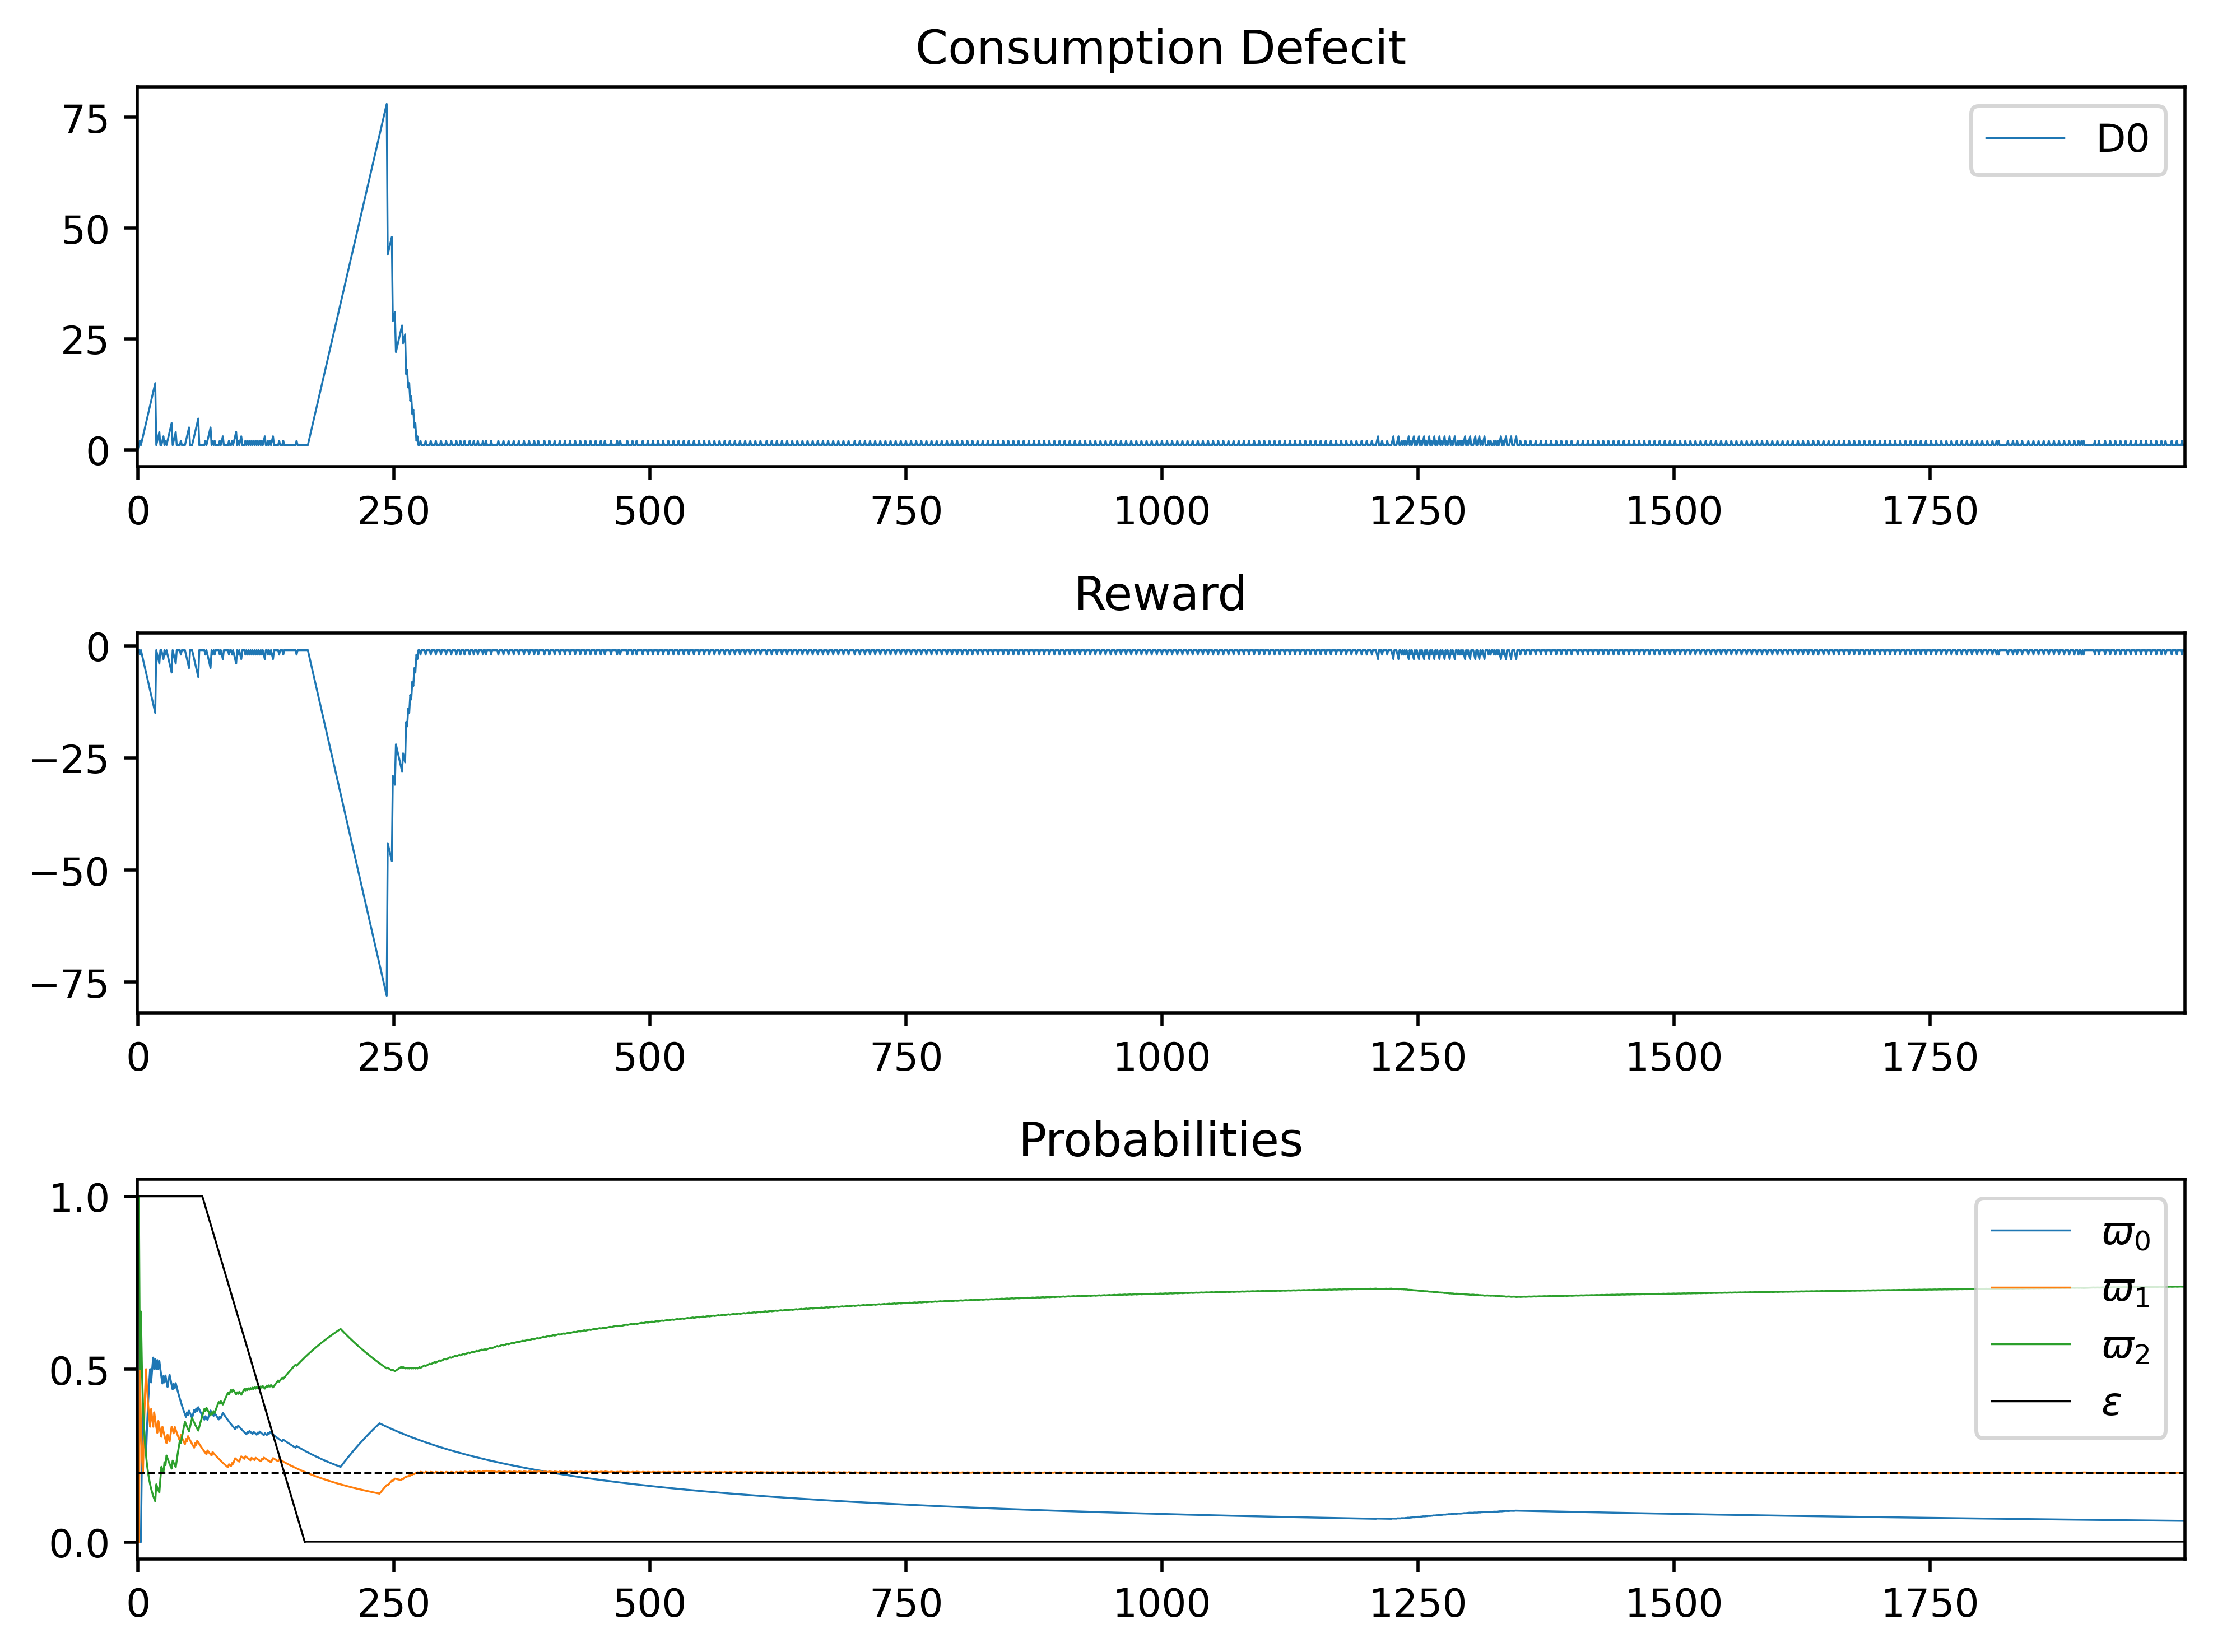

In [13]:
utils.plot_decisions(trange, Darray, Rarray, epsilon_list, Parray, omega)

Using Consumption Error Exponential Rewards

In [14]:
agent = Agent(gamma=0.9,#25, 
                  epsilon=1.0, 
                  eps_end = 0.001,
                  eps_dec = 0.01,
                  batch_size=64,  
                  input_dims=[state_dims], 
                  lr=0.001, 
                  n_actions=n_actions, 
                  )

env = Environment(cg=cg, 
                productivity=productivity, 
                dt=dt, 
                n_actions=n_actions,
                agent=agent)

env.set_reward_function('exponential error')

sim = Simulate(agent, env)

omega = env.omega1

In [15]:
env.reward_func

'exponential error'

In [16]:
trange, Aarray, qarray, Carray, Qarray, Darray, Rarray, epsilon_list, Parray =sim.run_simulation(Ntimes)

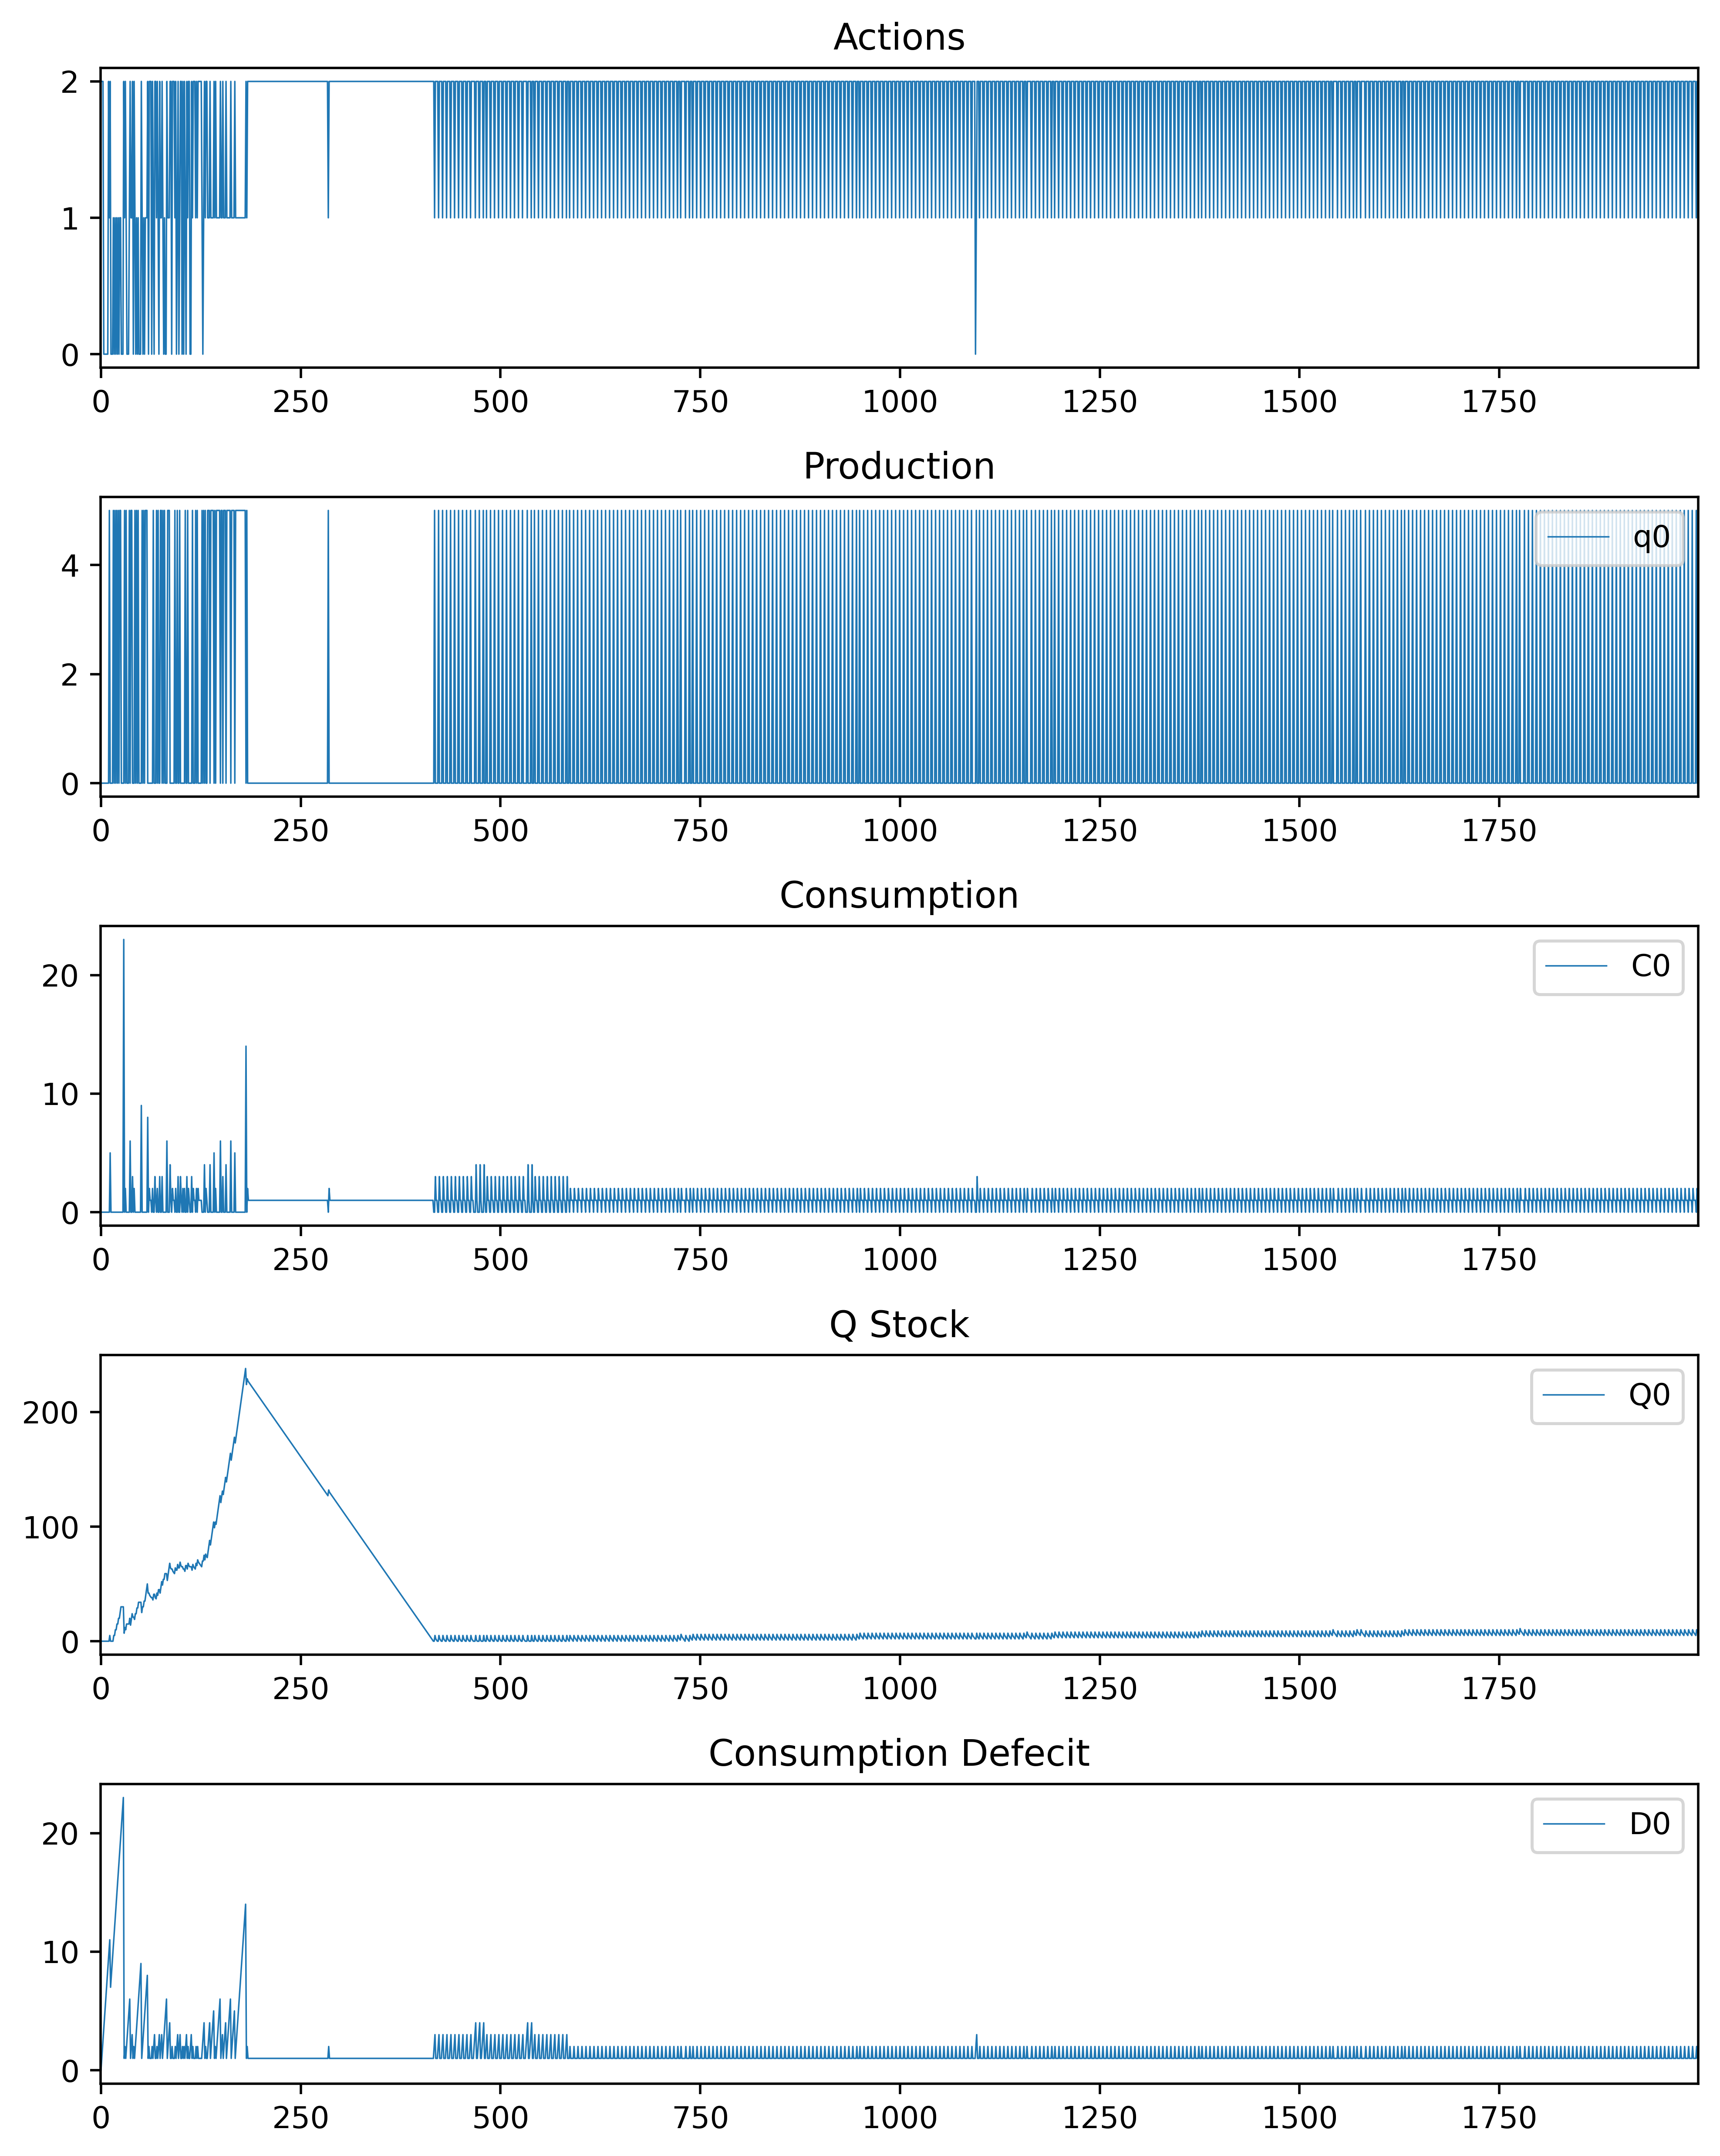

In [17]:
utils.plot_states(trange, Aarray, qarray, Carray, Qarray, Darray)

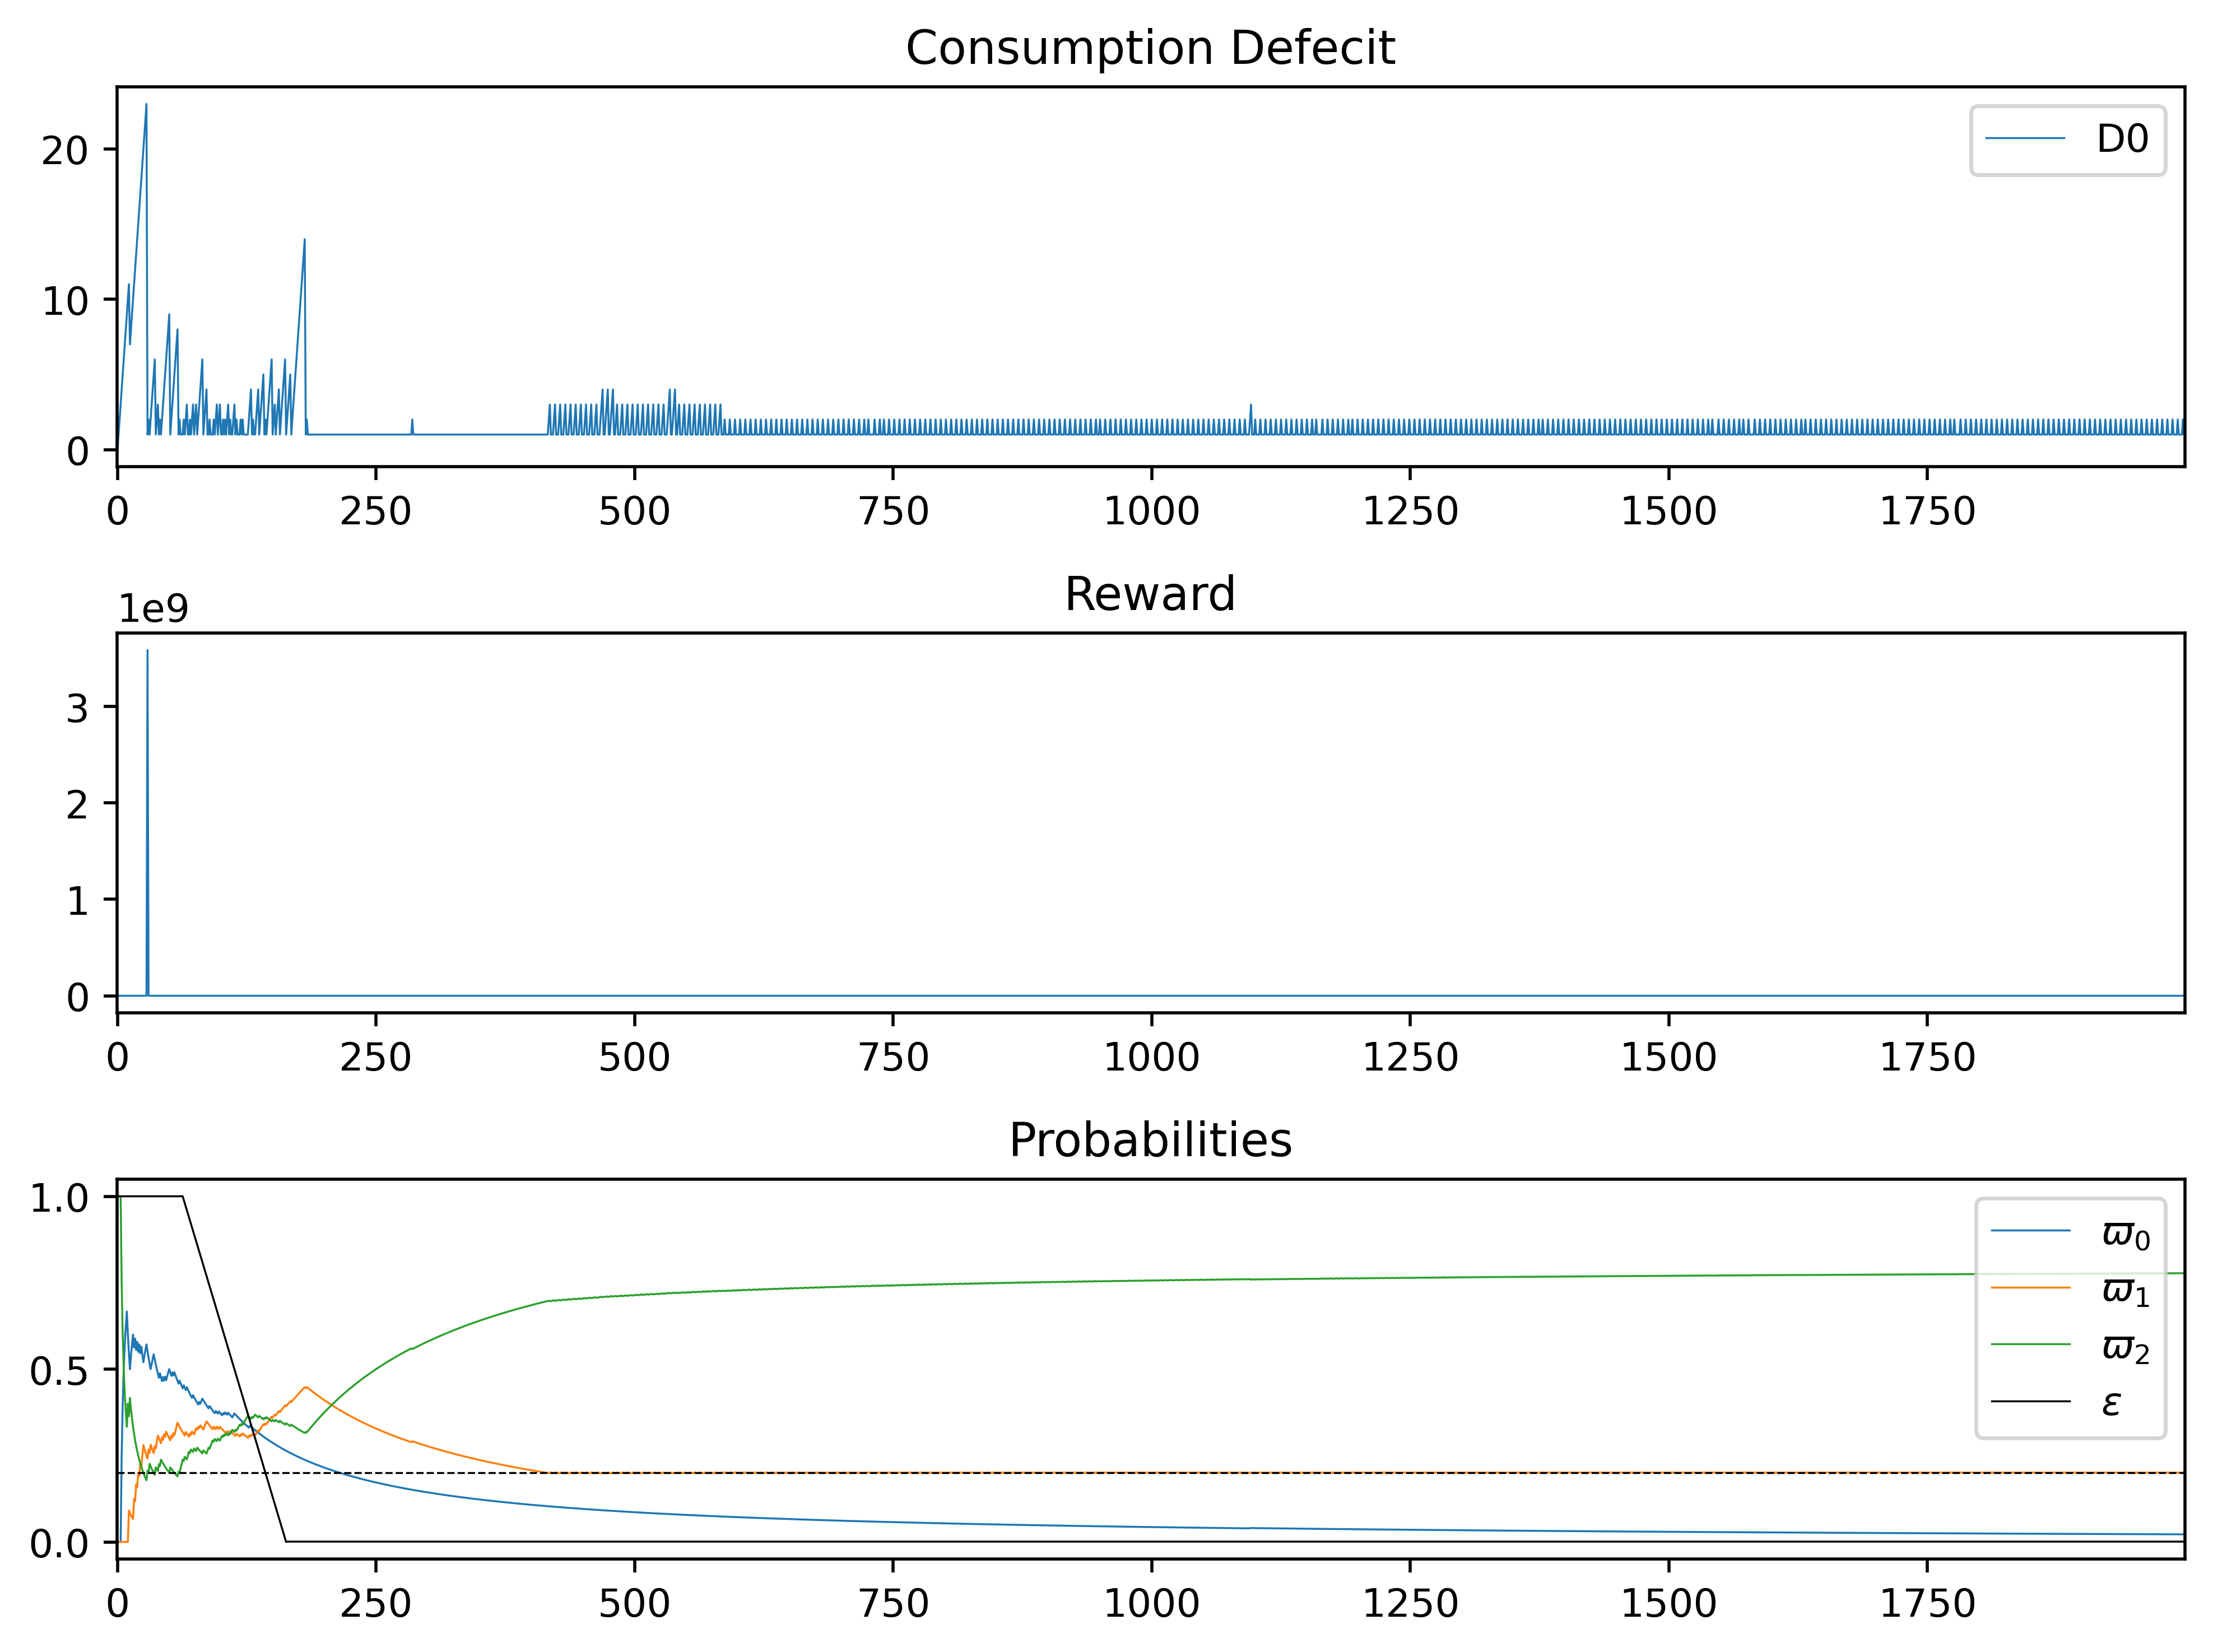

In [18]:
utils.plot_decisions(trange, Darray, Rarray, epsilon_list, Parray, omega)

In [19]:
env.update_reward()

1.0

In [20]:
env.agent.c_error = np.array([0,1,2,10,100])

In [21]:
env.update_reward()

1.5032601243378176

In [22]:
np.exp(-env.agent.c_error)

array([1.00000000e+00, 3.67879441e-01, 1.35335283e-01, 4.53999298e-05,
       3.72007598e-44])

In [23]:
np.nanmax(Rarray)

3584912846.131592

In [24]:
Carray[Rarray == np.nanmax(Rarray)]

array([[23.]])

In [25]:
Carray.max()

23.0

In [26]:
np.exp((1 - 49)/dt)

1.4251640827409352e-21

Using Deficit Exponential Rewards

In [27]:
agent = Agent(gamma=0.9,#25, 
                  epsilon=1.0, 
                  eps_end = 0.001,
                  eps_dec = 0.01,
                  batch_size=64,  
                  input_dims=[state_dims], 
                  lr=0.001, 
                  n_actions=n_actions, 
                  )

env = Environment(cg=cg, 
                productivity=productivity, 
                dt=dt, 
                n_actions=n_actions,
                agent=agent)

env.set_reward_function('exponential deficit')

sim = Simulate(agent, env)

omega = env.omega1

In [28]:
env.reward_func

'exponential deficit'

In [29]:
trange, Aarray, qarray, Carray, Qarray, Darray, Rarray, epsilon_list, Parray =sim.run_simulation(Ntimes)

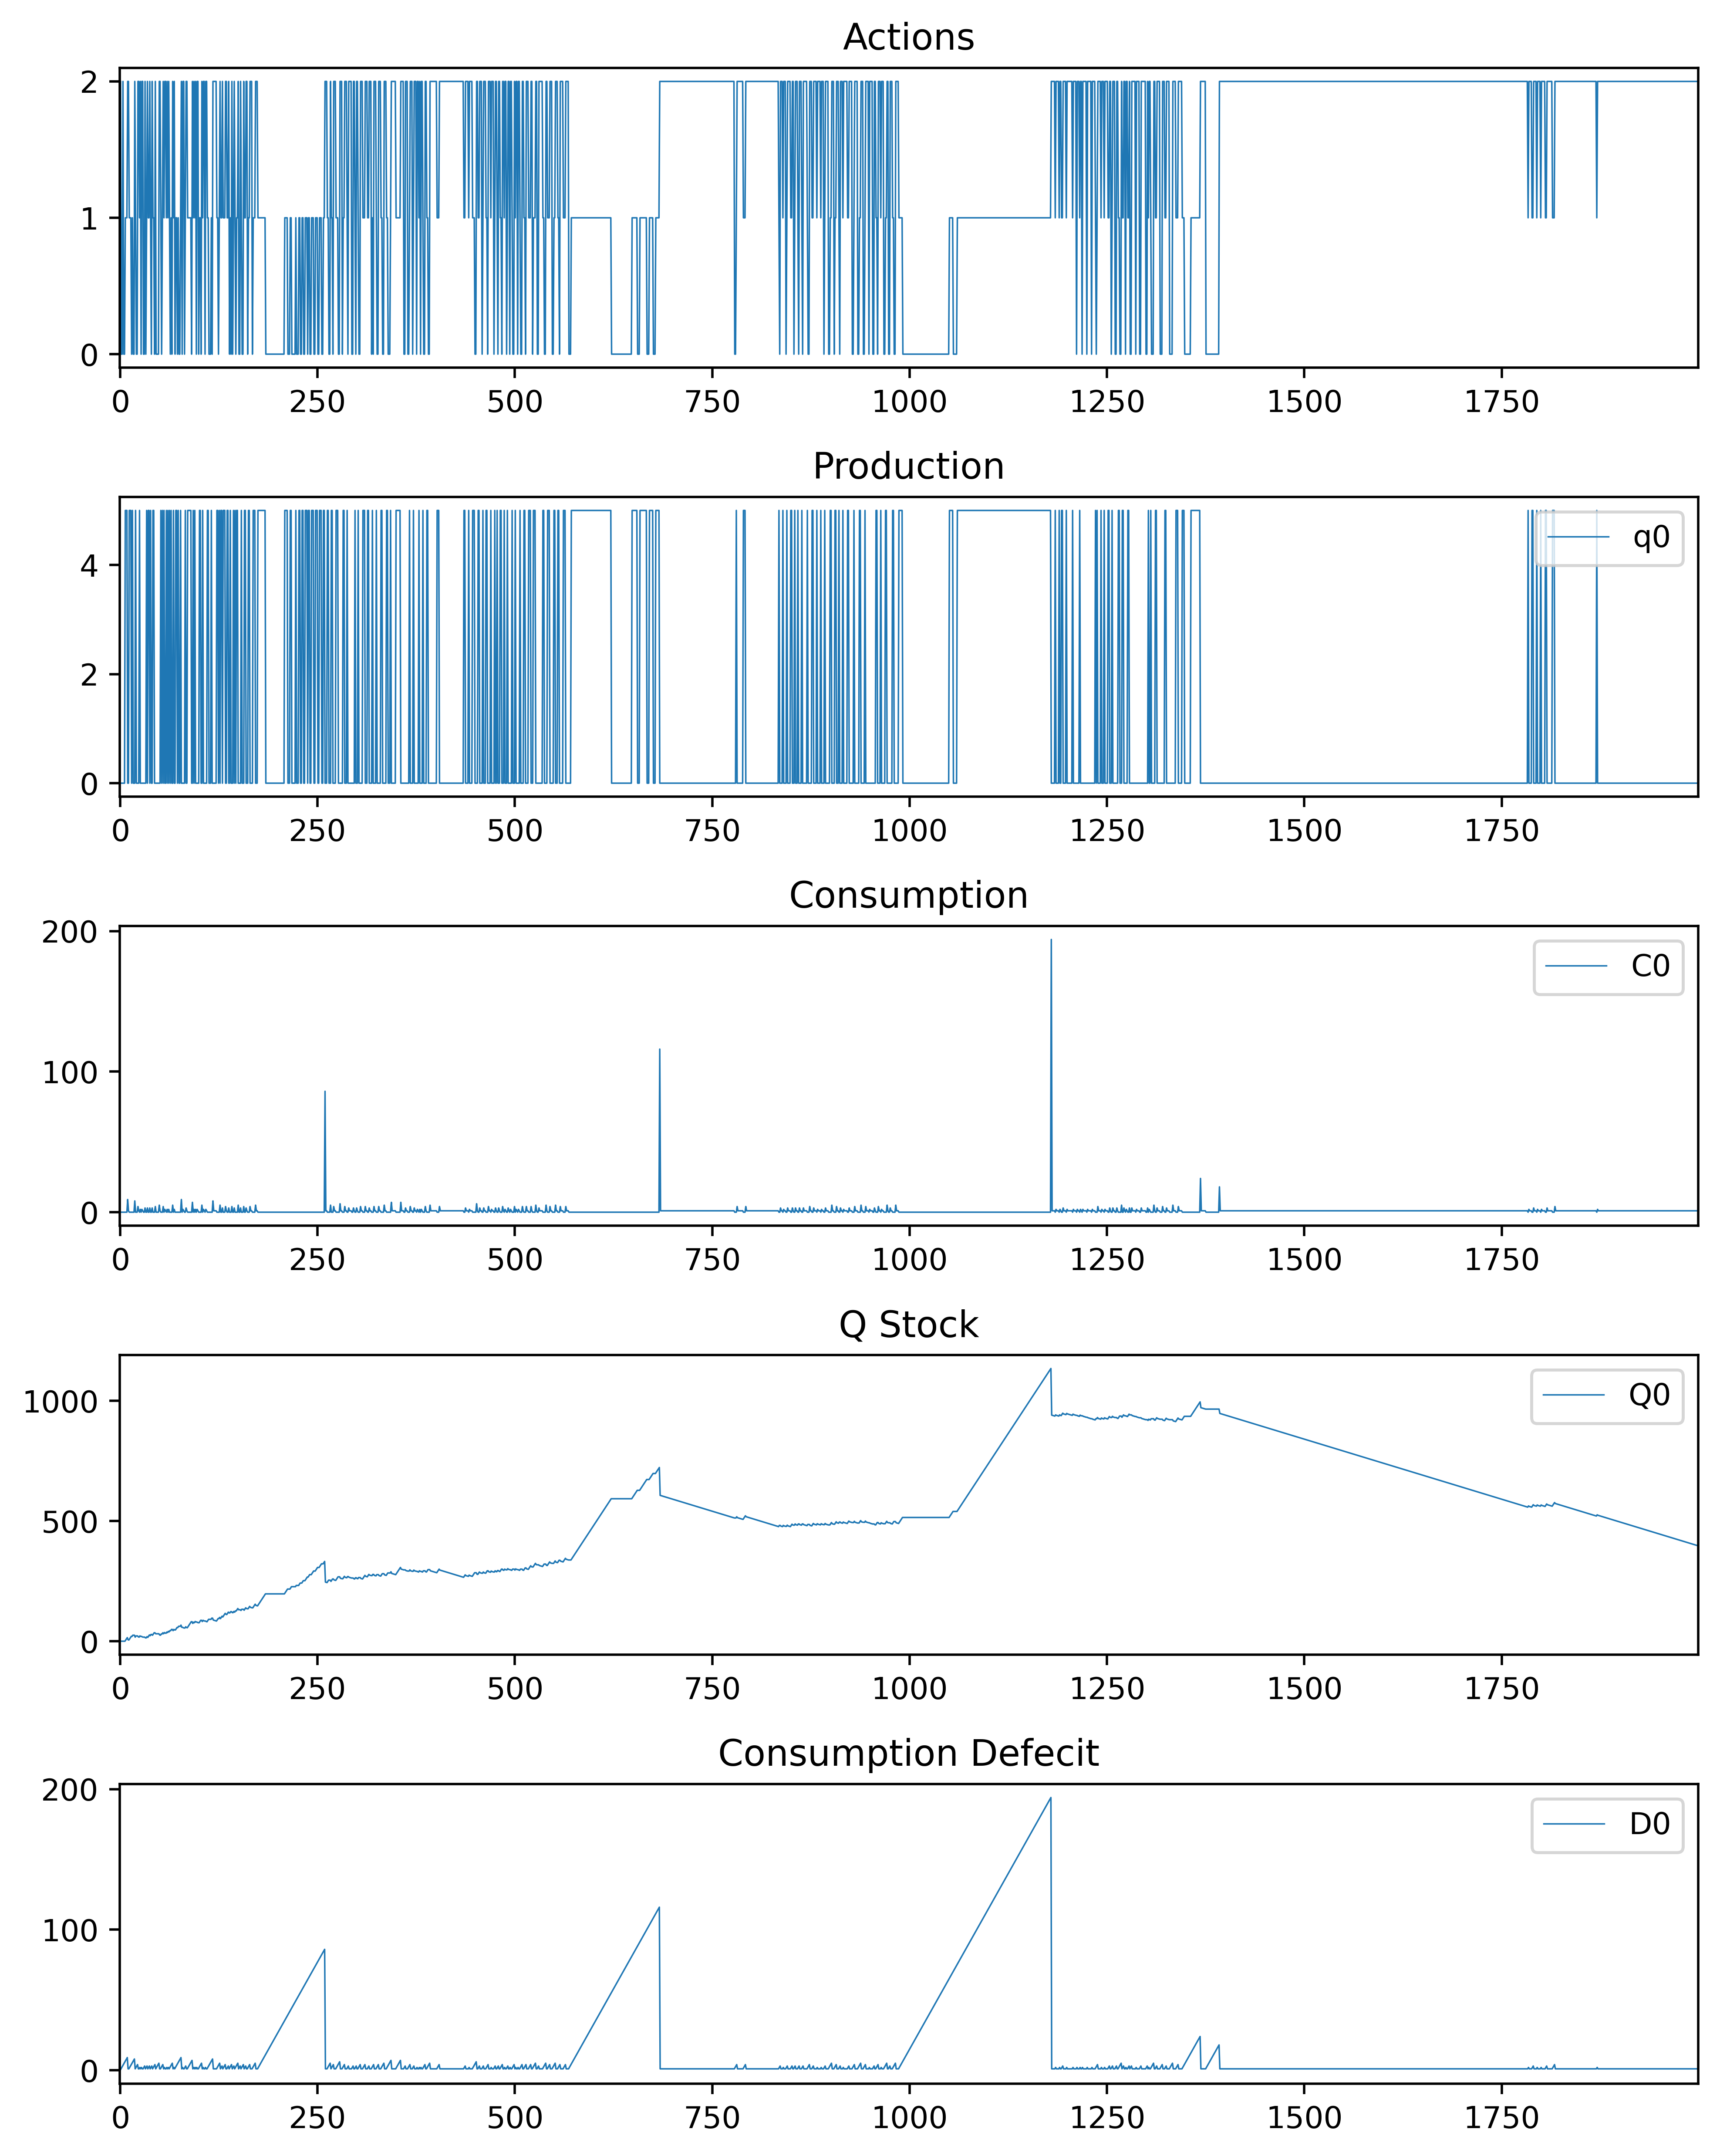

In [30]:
utils.plot_states(trange, Aarray, qarray, Carray, Qarray, Darray)

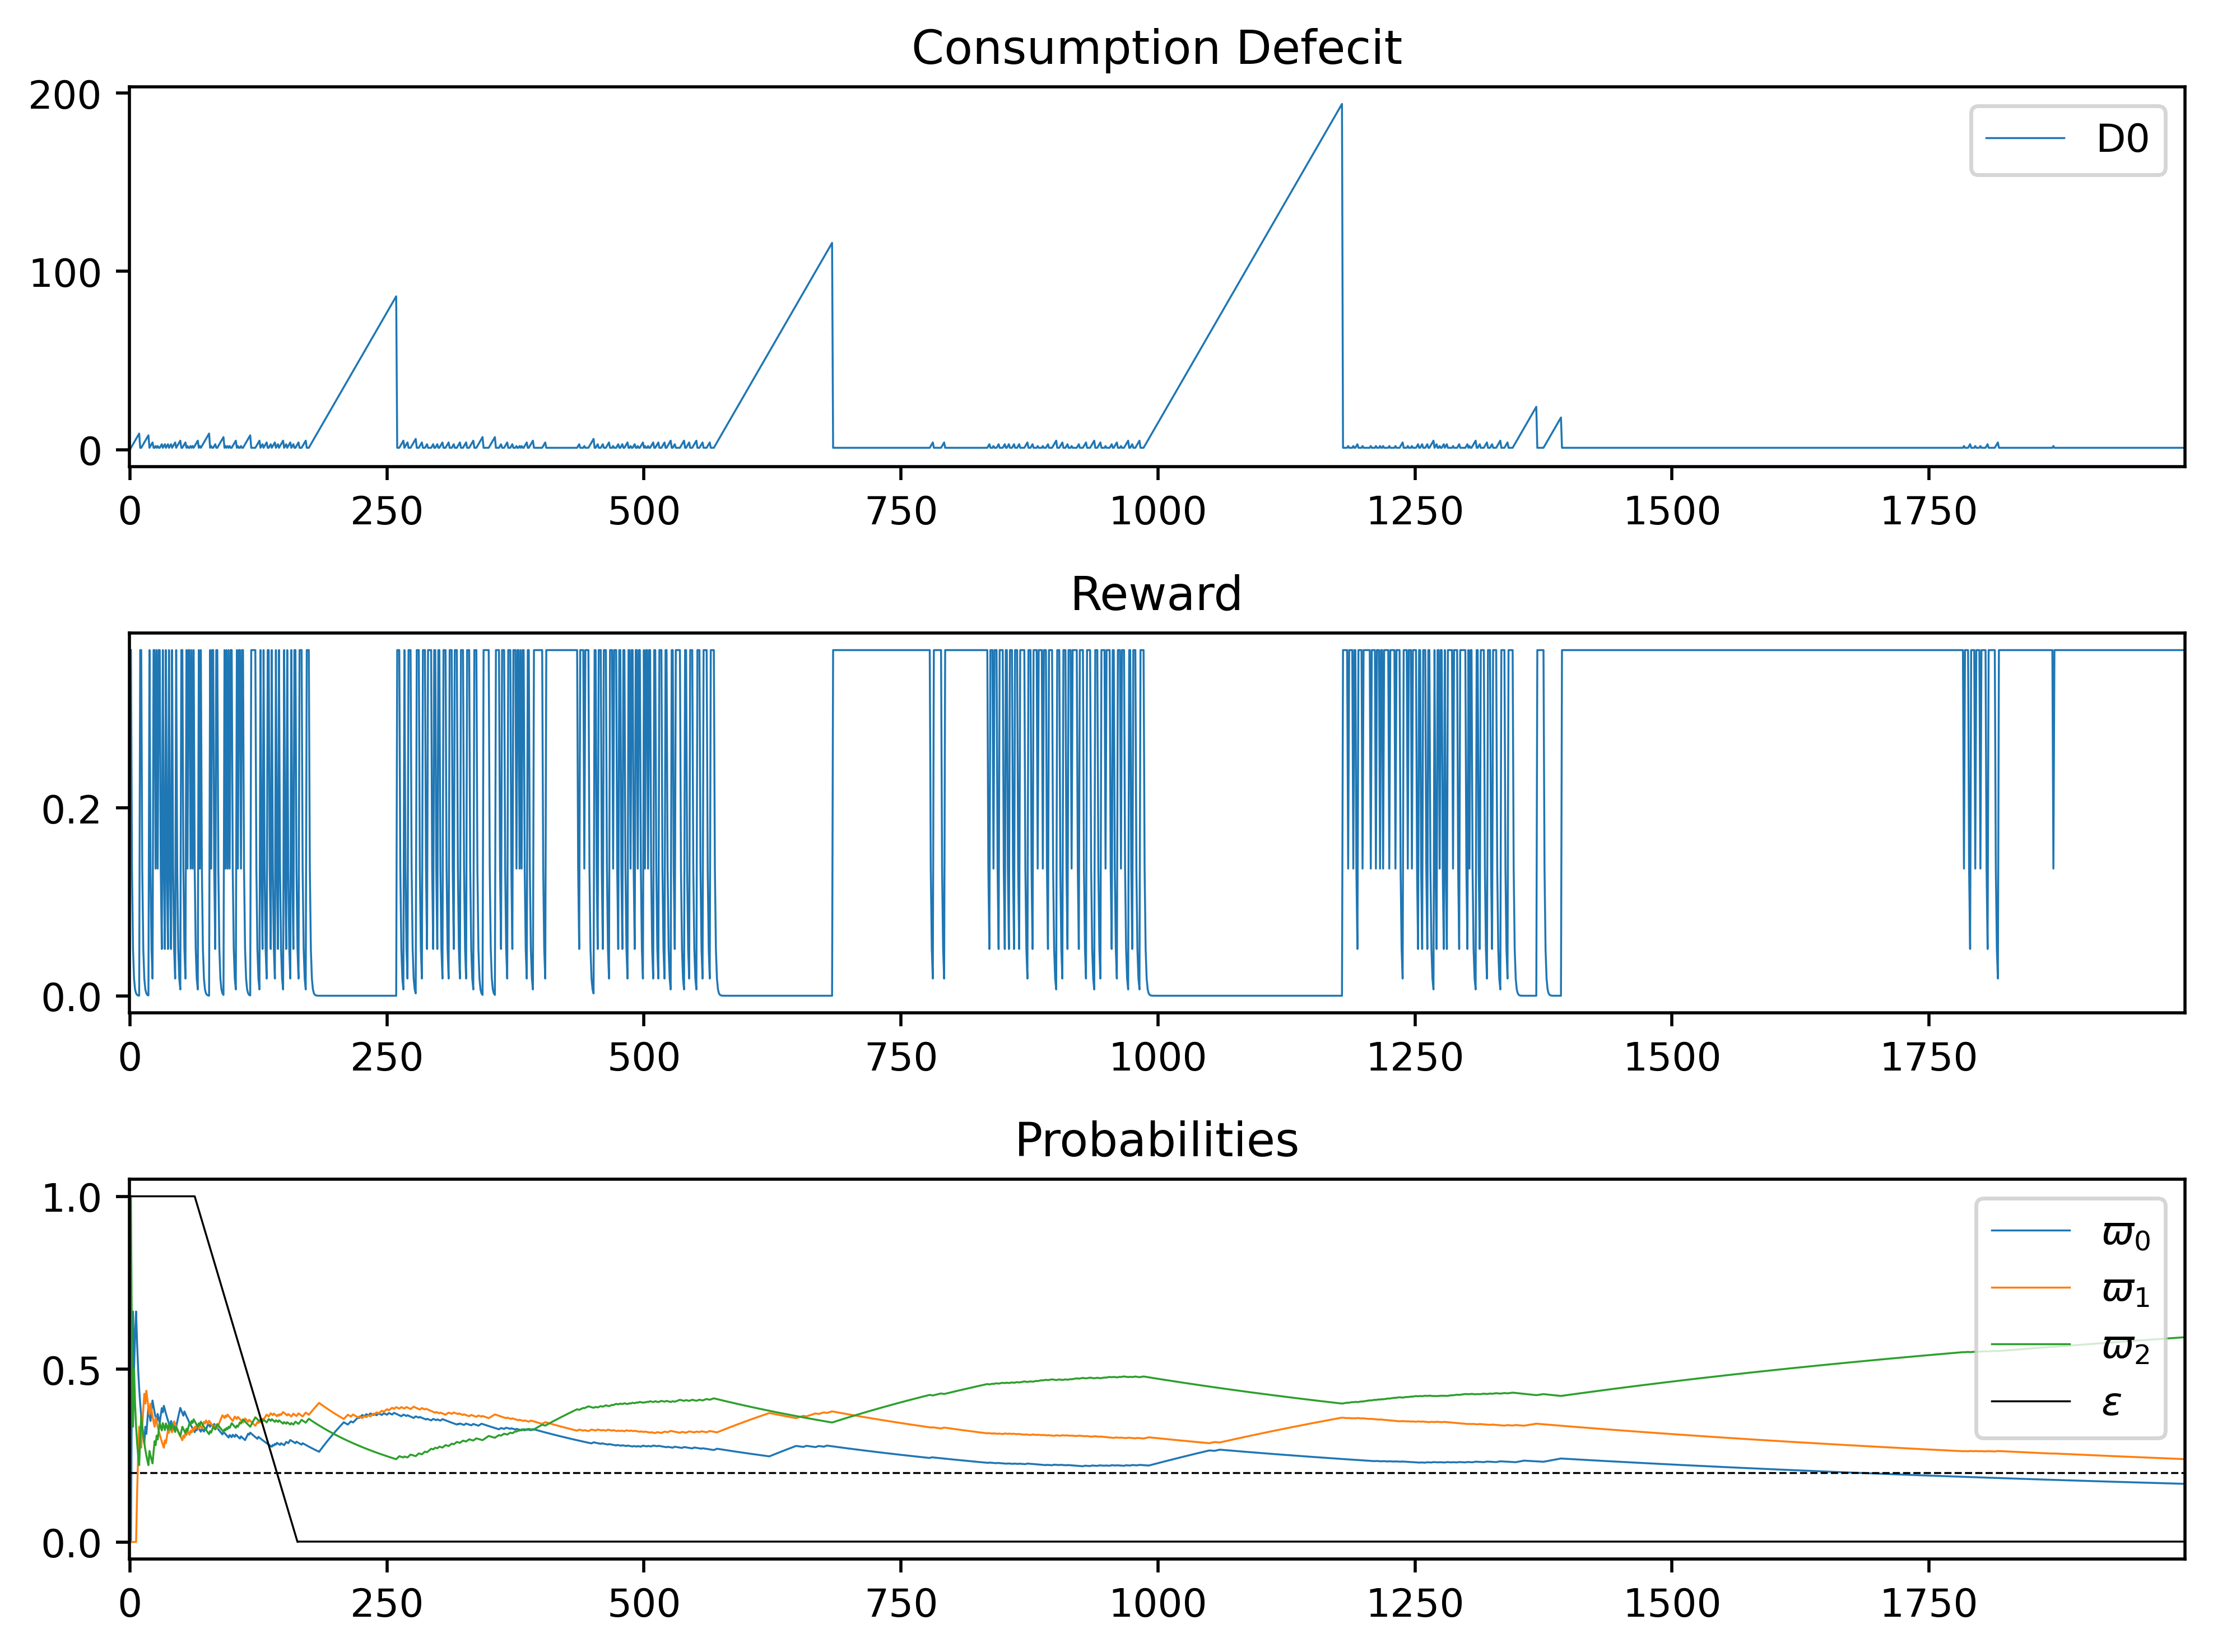

In [31]:
utils.plot_decisions(trange, Darray, Rarray, epsilon_list, Parray, omega)